In [52]:
import coremltools as ct
import numpy as np

In [53]:
seg_model = ct.models.MLModel("models/DeeplabV3.mlmodel")

In [54]:
image_dim = 513
preds=seg_model.predict({'ImageTensor':x}, useCPUOnly=True)
preds = preds['SemanticPredictions']

In [16]:
np.sum(preds)

0.0

In [55]:
import cv2 as cv

In [56]:
im=cv.imread('./mkbhd_potrait.png')

In [57]:
def get_border_dims(img):
    h, w, c = img.shape
    dim = max(w,h)
    bl = (dim-w)//2
    br = dim-(w+bl)
    bt = (dim-h)//2
    bb = dim-(h+bt)
    return bt, bb, bl, br

def padded_resize(img):
    bt, bb, bl, br = get_border_dims(img)
    padded_img = cv.copyMakeBorder(img, bt, bb, bl, br, cv.BORDER_CONSTANT)
    return padded_img

def adapt_to_model_input(img):
    MODEL_IN_IMAGE_SIZE = image_dim # batch_size, w, h, channels
    h, w, c = img.shape
    resize_ratio = 1.0 * MODEL_IN_IMAGE_SIZE / max(w, h)
    target_size = (int(resize_ratio * w), int(resize_ratio * h))
    resized_image = cv.resize(img, target_size)
    resized_image = cv.cvtColor(resized_image, cv.COLOR_BGR2RGB)
    padded_im = padded_resize(resized_image)
    # im_normed = padded_im.astype(np.uint8)#(padded_im/255.).astype(np.float32)
    batched_im = np.expand_dims(padded_im, 0)
    return batched_im.astype(np.float32)
model_in_img = adapt_to_model_input(im)

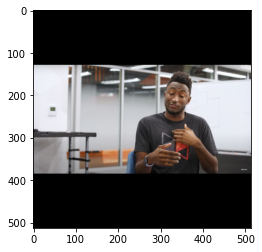

In [59]:
import matplotlib.pyplot as plt
plt.imshow(model_in_img.astype(np.uint8).squeeze())

In [60]:
preds=seg_model.predict({'ImageTensor':model_in_img}, useCPUOnly=True)
preds = preds['SemanticPredictions'].astype(np.int32).squeeze()

(array([222740.,      0.,      0.,      0.,      0.,      0.,      0.,
         32497.,      0.,   7932.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

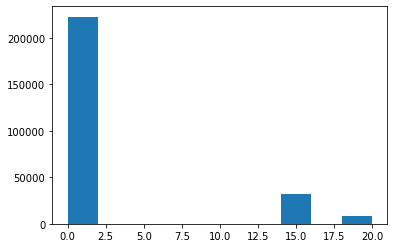

In [62]:
plt.hist(preds.astype(np.int32).flatten())

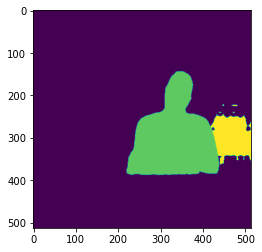

In [61]:
plt.imshow(preds)

# Inference on video

In [2]:
import cv2 as cv
import numpy as np

In [4]:
v_cap= cv.VideoCapture('/Users/akshit/Downloads/ranjeet_arm_clip.mp4')

while (v_cap.isOpened()):
    _, frame = v_cap.read()
    print(type(frame))
    cv.imshow('Frame', frame)
    # define q as the exit button
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
    
v_cap.release()
cv.destroyAllWindows()

<class 'numpy.ndarray'>
